# Esecuzione passo-passo di un programma con funzioni

Consideriamo il seguente programma.

In [1]:
def area_rettangolo(base, altezza):
    area = base * altezza
    return area

b = 5
a = 2
a1 = area_rettangolo(b, a)
a2 = area_rettangolo(7, 4)
print(a1,a2)

10 28


Questa è la sua esecuzione passo-passo.

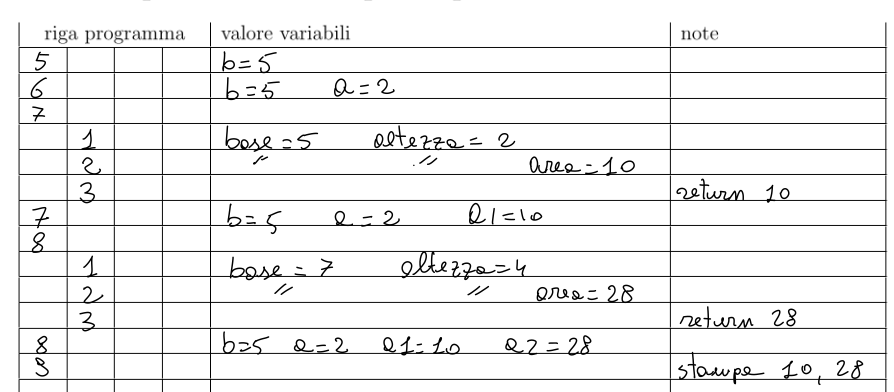

Notare che, per la prima volta, usiamo le colonne multiple per le righe del programma: ci spostiamo verso destra ogni volta che viene invocata una funzione, e torniamo a sinistra quando l'esecuzione della funzione termina.

# Parametri e visibilità delle variabili

I parametri di una funzione (più propriamente detti *parametri formali*) sono variabili come tutte le altre. Oltre a leggerle le possiamo anche modificare.

In [2]:
def stampa_serie(x):
    print(x)
    x += 1
    print(x)
    x += 1
    print(x)

stampa_serie(3)

3
4
5


Notare però che queste variabili esistono solo dentro il codice della funzione, sono invisibili al di fuori. Sebbene la funzione `stampa_serie` usi la variabile `x`, se provo a visualizzarne il valore da fuori la funzione ottengo un errore. In gergo informatico, diciamo che `x` è una *variabile locale*, mentre le variabili che esistono al di fuori di ogni funzione si chiamano *variabili globali*.

In [3]:
print(x)

NameError: name 'x' is not defined

Questa regola non vale solo per i parametri. Qualunque variabile definisco dentro una funzione, esiste solo al suo interno.

In [4]:
def incremento(x):
    y = x+1
    return y

print(incremento(4))
print(y) # restituisce errore perchè y esiste solo nella funzione incremento

5


NameError: name 'y' is not defined

In generale, la parte di un programma dove una variabile è visibile si chiama *ambito di visibilità della variabile* o, in inglese, *variable scope*. L'ambito di visibilità di una variabile locale è la funzione in cui essa è definita. Per le variabilo globali l'ambito di visibilità è il programma principale (ma non solo, vedremo degli esempi in un'altra lezione).

Le eventuali modifiche effettuate ai parametri, non si ripercuotono sugli argomenti (chiamati anche *parametri attuali* o *parametri effettivi*) della chiamata di funzione.

In [5]:
def incremento2(x):
    x = x+1
    return x
z = 3
print(incremento2(z))

4


Qui la variabile `z` è stata passata al parametro `x` di `incremento2`. Il parametro `x` è stato successivamente incrementato, e infatti il risultato di `incremento2(z)` è `4`. Ma `z` è rimasta comunque uguale a 3.

In [6]:
print(z)

3


Per chiarire questo punto, consideriamo il seguente programma.

In [ ]:
def incremento2(x):
    x = x + 1
    return x

z = 3
print(incremento2(z))
print(z)
x = 4
print(incremento2(x))
print(x)

e la sua esecuzione passo-passo:

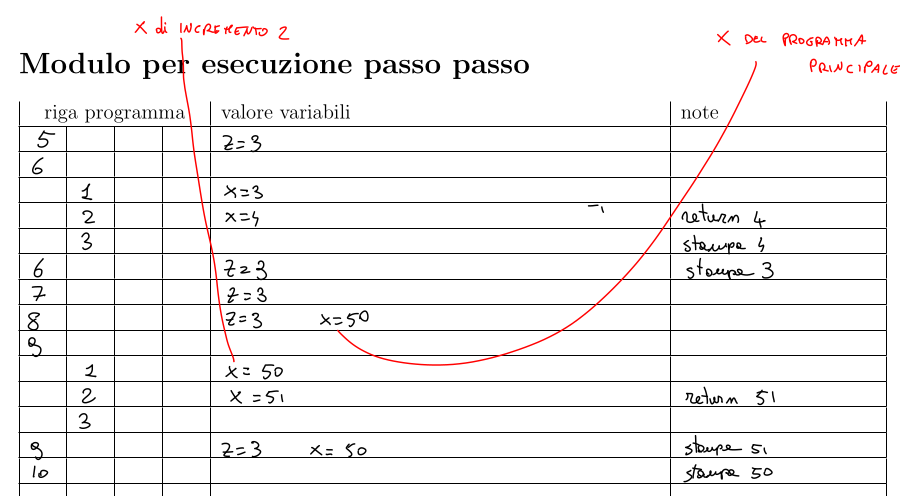

Notare che la variabile globale `x` e il paramtro `x` di `incremento2`, sebbene abbiano lo stesso nome, sono due variabili completamente diverse. 

# Un programma più complesso

Consideriamo adesso la soluzione all'esercizio 7 della lezione di laboratorio del 6 novembre, un programma che preso un intero n, stampa l'elenco di tutti i numeri primi da 2 fino ad n. Ne scriviamo una nuova versione che divide il suo compito in varie funzioni.

Nella scrittura di questo programma, abbiamo seguito una procedura nota come *raffinamento successivo* (o, *stepwise refinement* in inglese). Siampo partiti dal problema principale, ovvero visualizzare la lista dei numeri primi da 2 fino ad n, per il quale abbiamo scritto la funzione *lista_primi*. Nello scrivere *lista_primi* ci siamo accorti che serve un modo per determinare se un numero è primo o no. Non abbiamo messo il codice direttamente dentro la funzione *lista_primi*, ma abbiamo creato una funzione apposita *primo* per determinare se un certo numero è primo o no: la funzione *lista_primi* utilizza la funzione *primo* al suo interno.

Quando siamo passati a scrivere la funzione *primo*, ci siamo resi conto che ci serviva un modo per determinare se un numero era divisibile per un altro. Anche per questo abbiamo deciso di scrivere una funzione apposita, la funzione *divisibile* da utilizzare all'interno della funzione *primo*.

In questo modo, abbiamo piano piano scomposto il problema di partenza in problemi sempre più piccoli, che sappiamo risolvere. Un altro esempio di questo modo di procedere la trovate nella Sezione 5.7 nel libro di testo.

In [19]:
# Scrivere un programma che accetta in input un numero positivo n e stampa la lista
# di tutti i numeri primi da 2 fino ad n.
# Esempio: se l'input è 6, l'output sarà 2, 3, 5

def divisibile(a, b):
    # Dati due numeri a e b, restituisce True se a è divisibile per b, False altrimenti.
    risultato = a % b == 0
    return risultato

def primo(n):
    # Dato il numero intero n >= 2, restituisce True se n è un numero primo, False altrimenti.
    primo = True
    for i in range(2, n):
        if divisibile(n, i):
            primo = False
    return primo

def lista_primi(n):
    for candidato_primo in range(2, n+1):
        if primo(candidato_primo):
            print(candidato_primo)

n = int(input("Immetti numero: "))
lista_primi(n)

2
3
5
7


Ecco alcuni esempi di utilizzo delle singole funzioni che compongono il programma:

In [20]:
divisibile(6, 3)

True

In [9]:
divisibile(6, 5)

False

In [10]:
primo(5)

True

In [11]:
primo(14)

False

In [12]:
lista_primi(10)

2
3
5
7


Notiamo che le funzioni si richiamano tra di loro. La funzione `primo` chiama `divisibile` al suo interno, e `lista_primi` chiama `primo`. Quella che segue è una esecuzione passo-passo del programma.

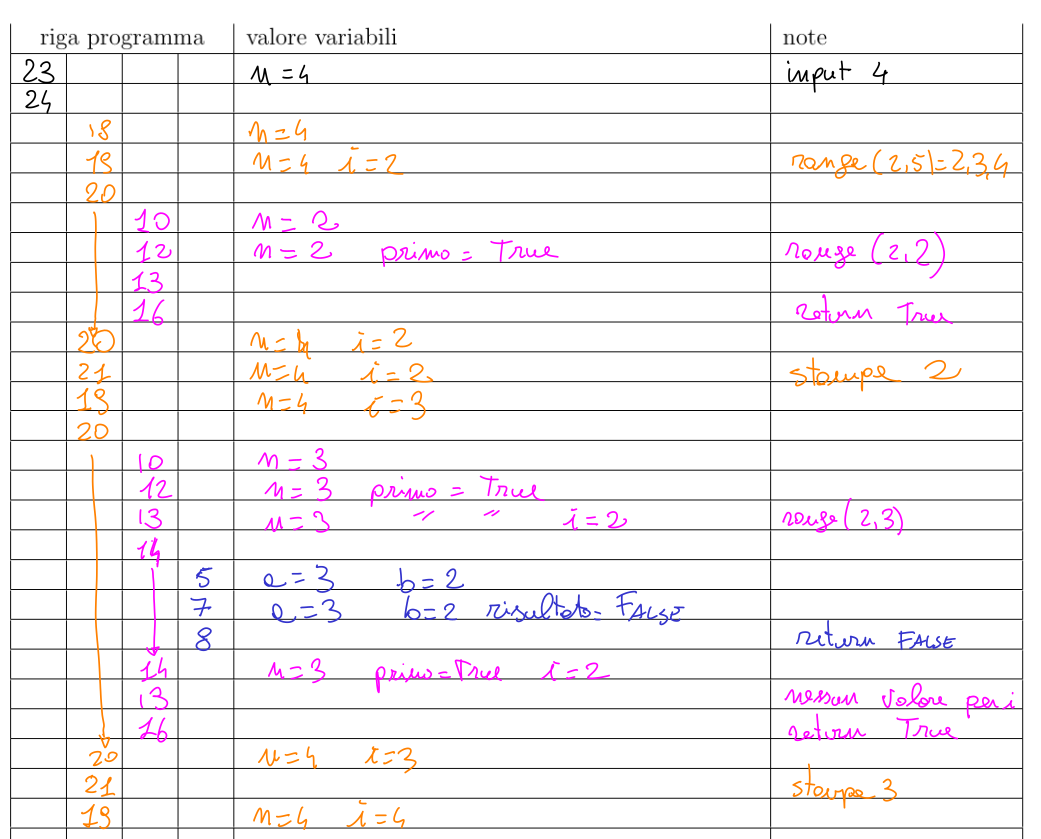

# Documentazione di funzioni e *docstring*

Ogni funzione ha una documentazione, alla quale si può accedere con il comando `help`, e che è utilizzata anche dall'ambiente di sviluppo.

In [23]:
help(round)

Help on built-in function round in module builtins:

round(number, ndigits=None)
    Round a number to a given precision in decimal digits.
    
    The return value is an integer if ndigits is omitted or None.  Otherwise
    the return value has the same type as the number.  ndigits may be negative.



Anche le funzioni che scriviamo noi possono essere dotate di documentazione: è sufficiente scrivere del testo tra l'intestazione della funzione e il corpo, tra delle triple virgolette, come fatto qua sotto Questo tipo di documentazione è chiamata *docstring*.

In [21]:
def divisibile(a, b):
    """
    Dati due numeri a e b, restituisce True se a è divisibile per b, False altrimenti.
    """
    risultato = a % b == 0
    return risultato

def primo(n):
    """
    Dato il numero intero n >= 2, restituisce True se n è un numero primo, False altrimenti.
    """
    primo = True
    for i in range(2, n):
        if divisibile(n, i):
            primo = False
            break
    return primo

def lista_primi(n):
    # Stampa tutti i primi da 2 fino ad n.
    for candidato_primo in range(2, n+1):
        if primo(candidato_primo):
            print(candidato_primo)


In [14]:
help(primo)

Help on function primo in module __main__:

primo(n)
    Dato il numero intero n >= 2, restituisce True se n è un numero primo, False altrimenti.



In [15]:
help(divisibile)

Help on function divisibile in module __main__:

divisibile(a, b)
    Dati due numeri a e b, restituisce True se a è divisibile per b, False altrimenti.



Notare che la funzione `lista_primi`, che non ha una docstring ma un commento standard, non presenta documentazione.

In [17]:
help(lista_primi)

Help on function lista_primi in module __main__:

lista_primi(n)



# Funzioni senza parametri

Per chiamare una funzione, è sempre necessario mettere le parentesi tonde dopo il nome, anche se la funzione non ha parametri. Ad esempio:

In [22]:
# Definisce una funzione che stampa "Sono inutile" e che non ha
# parametri. Notare che è necessario mettere le parentesi tonde dopo
# il nome.

def inutile():
    print("Sono inutile")

In [23]:
# Per chiamare la funzione di prima, è necessario mettere le parentesi tonde
# dopo il nome.

inutile()

Sono inutile


Se dimentichiamo le parentesi tonde, otteniamo uno strano risultato:

In [29]:
inutile

<function __main__.inutile()>

# Variabili di tipo funzione

I nomi delle funzioni sono in realtà variabili come le altre, solo che invece di contenere un numero, una stringa, un booleano o altro, contengono una funzione. Pertanto, scriver soltanto il nome della funzione senza le tonde causa semplicemente la visualizzazione del contenuto della variabile. In realtà, non viene stampata propria tutta la funzione, ma solo l'intestazione (un po' rimaeggiata).

In [24]:
primo

<function __main__.primo(n)>

In [26]:
abs

<function abs(x, /)>

In [27]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

Siccome `abs`, `print`, `primo` sono variabili come tante, è possibile cambiare il loro valore. Ma facendo casì, la funzione originaria non è più utilizzabile. Ad esempio:

In [29]:
# calcola il valore assoluto di -5
abs(-5)

5

In [30]:
# adesso nella variabile abs metto il valore 4
abs = 4

In [31]:
# se provo a richiamare la funzione abs ottengo un errore: abs non contiene
# più una funzione, ma il numero 4, e non ha senso "invocare un numero".

abs(-5)

TypeError: 'int' object is not callable

Poiché le funzioni sono valoi come gli altri, è possibile copiarli. Per esempio:

In [35]:
# metto nella variabile aaa il valore della variabile min (che contiene una funzione)
aaa = min

In [37]:
# si vede che aaa contiene effetivamente la funzione min
aaa

<function min>

In [38]:
# e quindi la posso chiamare e genera lo stesso effetto di min
aaa(3,4,5)

3

In [40]:
# anche se ad un certo punto modifico min, aaa continua a calcolare il minimo
min = 45
aaa(4,3,5)

3

In [42]:
# ma min non funziona più, perché ora min contiene il numero 45
min(4,3,5)

TypeError: 'int' object is not callable